# FIFA DataSet Analysis


* Importing Libraries

In [2]:

#Numpy
import numpy as np

# Pandas
import pandas as pd

# BeautifulSoup
from bs4 import BeautifulSoup

# Requests
import requests

# Reges
import regex as re 

# sqlite
import sqlite3 as sql

# MatplotLib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

* Web Scrapping


In [3]:
req=requests.get("https://sofifa.com/players?offset=1")
req

<Response [200]>

* BeautifulSoup

In [4]:
soup=BeautifulSoup(req.content)

In [5]:
# Adding the attributes to the array
arr=[]
for i in soup.findAll('td'):
    arr.append(str(i))

* Cleaning Image URL

In [6]:
clean_img=re.sub('<td.*\n.*data-src=.|".*',"",arr[0])
clean_img

'https://cdn.sofifa.net/players/210/315/22_60.png'

In [7]:
# The row is from 0-8
arr[0]

'<td class="col-avatar" data-balloon="Click here!" data-balloon-pos="up" data-balloon-visible=""><figure class="avatar">\n<img alt="" class="player-check" data-root="https://cdn.sofifa.net/players/" data-src="https://cdn.sofifa.net/players/210/315/22_60.png" data-srcset="https://cdn.sofifa.net/players/210/315/22_120.png 2x, https://cdn.sofifa.net/players/210/315/22_180.png 3x" data-type="player" id="210315" src="https://cdn.sofifa.net/players/notfound_0_60.png"/></figure></td>'

* Cleaning Name

In [8]:
clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",arr[1])
clean_name

'De Tomás'

* Cleaning Age

In [9]:
clean_age=re.sub('<td.*e">|<.*>',"",arr[11])
clean_age

'18'

* Cleaning OVA

In [10]:
clean_ova=re.sub('<td.*p.*">|<.*>',"",arr[3])
clean_ova

'82'

* Cleaning POT

In [11]:
clean_pot=re.sub('<td.*p.*">|<.*>',"",arr[4])
clean_pot

'83'

* Cleaning Team & Contract

In [12]:
clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",arr[5])
clean_team

'RCD Espanyol de Barcelona'

* Cleaning Value

In [13]:
clean_value=re.sub('<td.*">|<.*>',"",arr[6])
clean_value

'€36.5M'

* Cleaning Wage

In [14]:
clean_wage=re.sub('<td.*">|<.*>',"",arr[7])
clean_wage

'€32K'

* Cleaning Total

In [15]:
clean_total=re.sub('<td.*">|<.*>',"",arr[8])
clean_total

'2091'

* Looping through the data

In [16]:
#0-8
img=[]
name=[]
age=[]
ova=[]
pot=[]
team=[]
value=[]
wage=[]
total=[]

count=0
for j in range(1,20):
    url=f"https://sofifa.com/players?offset={j}"
    req=requests.get(url)
    soup=BeautifulSoup(req.content)
    
    for i in soup.findAll('td'):
        clean_img=re.sub('<td.*\n.*data-src=.|".*',"",str(i))
        clean_name=re.sub('<td.*\n.*s">|<\/div.*>',"",str(i))
        clean_age=re.sub('<td.*e">|<.*>',"",str(i))
        clean_ova=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_pot=re.sub('<td.*p.*">|<.*>',"",str(i))
        clean_team=re.sub('<td.*\n<d.*\n<i.*\n</f.*\n.*/">|<.*\n.*>\n.*>\n.*>',"",str(i))
        clean_value=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_wage=re.sub('<td.*">.|.<.*>',"",str(i))
        clean_total=re.sub('<td.*">|<.*>',"",str(i))
        
        if count==0:
            img.append(clean_img)
            count+=1
        elif count==1:
            name.append(clean_name)
            count+=1
        elif count==2:
            age.append(clean_age)
            count+=1
        elif count==3:
            ova.append(clean_ova)
            count+=1
        elif count==4:
            pot.append(clean_pot)
            count+=1
        elif count==5:
            team.append(clean_team)
            count+=1
        elif count==6:
            value.append(clean_value)
            count+=1
        elif count==7:
            wage.append(clean_wage)
            count+=1
        else:
            count=0
            total.append(clean_total)
        


* Type casting

In [17]:
fifa=pd.DataFrame({'Image':img,'Name':name,'Age':age,'OVA':ova,'POT':pot,'Team':team,'Value (M$)':value,'Wage (K$)':wage,'Total':total})
fifa['Age']=pd.to_numeric(fifa['Age'])
fifa['OVA']=pd.to_numeric(fifa['OVA'])
fifa['POT']=pd.to_numeric(fifa['POT'])
fifa['Value (M$)']=pd.to_numeric(fifa['Value (M$)'])
fifa['Wage (K$)']=pd.to_numeric(fifa['Wage (K$)'])
fifa['Total']=pd.to_numeric(fifa['Total'])

In [18]:
# Getting the basic info for the DF
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image       1140 non-null   object 
 1   Name        1140 non-null   object 
 2   Age         1140 non-null   int64  
 3   OVA         1140 non-null   int64  
 4   POT         1140 non-null   int64  
 5   Team        1140 non-null   object 
 6   Value (M$)  1140 non-null   float64
 7   Wage (K$)   1140 non-null   int64  
 8   Total       1140 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 80.3+ KB


In [19]:
# Shape of the DF
fifa.shape

(1140, 9)

*Droping the Image url column from the DF

In [20]:
# Remmoving the Image column
fifa.drop(columns=["Image"],inplace=True,axis=1)

* 1st 20 datapoints

In [21]:
fifa.head(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
0,De Tomás,26,82,83,RCD Espanyol de Barcelona,36.5,32,2091
1,A. Hložek,18,77,87,AC Sparta Praha,22.0,50,1929
2,Bruno Guimarães,23,80,85,Newcastle United,29.0,39,2077
3,Joelinton,24,74,79,Newcastle United,6.5,29,1930
4,N. Keïta,26,80,81,Liverpool,24.5,110,2077
5,D. Hancko,23,77,85,AC Sparta Praha,22.0,95,2011
6,D. Vlahović,21,83,90,Juventus,74.5,85,1874
7,A. Saint-Maximin,24,81,84,Newcastle United,35.0,46,1919
8,A. Karabec,17,72,85,AC Sparta Praha,5.5,50,1791
9,N. Zalewski,19,68,82,Roma,2.9,10,1697


* Last 20 Datapoints

In [22]:
fifa.tail(20)

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
1120,M. Vitík,18,70,81,AC Sparta Praha,3.1,50,1563
1121,J. Willock,21,75,84,Newcastle United,12.5,26,1999
1122,I. Konaté,22,80,88,Liverpool,44.5,85,1737
1123,M. Vandevoordt,19,70,84,KRC Genk,3.3,3,1062
1124,F. Wirtz,18,82,90,Bayer 04 Leverkusen,64.0,24,1989
1125,Fábio Carvalho,18,73,86,Fulham,7.0,15,1784
1126,R. Cherki,17,73,88,Olympique Lyonnais,7.0,6,1718
1127,Diogo Jota,24,85,89,Liverpool,78.0,155,2188
1128,David Neres,24,79,82,Shakhtar Donetsk,24.0,1,1906
1129,P. Foden,21,84,92,Manchester City,94.5,140,2073


* Statistical Data

In [23]:
fifa.describe()

,Age,OVA,POT,Value (M$),Wage (K$),Total
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,21.274561,78.664035,87.232456,39.227982,66.695614,1940.682456
std,4.336895,6.179800,3.362161,35.990692,81.737666,207.472086
min,16.000000,64.000000,76.000000,1.700000,1.000000,1062.000000
25%,18.000000,74.000000,85.000000,10.000000,15.000000,1801.000000
50%,21.000000,79.000000,88.000000,32.000000,35.000000,1970.000000
75%,22.000000,82.000000,89.000000,58.500000,85.000000,2096.000000
max,36.000000,92.000000,95.000000,194.000000,450.000000,2238.000000


# Analysis

* Display and drop all the duplicated datas

In [37]:
# Numbr of the duplicated datas
fifa.duplicated().sum()
fifa.drop_duplicates(inplace=True)

* Player who is having the highest wage?

In [25]:
fifa[fifa['Wage (K$)']==max(fifa['Wage (K$)'])]

# K. Benzema is the player with highest wage


,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
35,K. Benzema,33,91,91,Real Madrid CF,84.0,450,2145


* Find the youngest player(s)

In [26]:
# Youngest player
fifa[fifa['Age']==min(fifa['Age'])]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
11,N. Mbamba,16,64,88,Club Brugge KV,1.7,50,1546
13,Y. Moukoko,16,69,89,Borussia Dortmund,3.8,5,1725
14,Gavi,16,77,89,FC Barcelona,24.0,14,1970


* Find the oldest player(s)

In [27]:
# Oldest player
fifa[fifa['Age']==max(fifa['Age'])][['Name',"Age"]]

,Name,Age
37,Cristiano Ronaldo,36


* List out the Top 10 players according to their POT

In [28]:
fifa.sort_values(by="POT", ascending=False)['Name'].head(10)

57              K. Mbappé
659            E. Haaland
22               L. Messi
297              P. Foden
55             F. de Jong
23                  Pedri
1139           K. Havertz
37      Cristiano Ronaldo
35             K. Benzema
599          Vinícius Jr.
Name: Name, dtype: object

* Create a new DataFrame with the values of columns - Name & POT

In [29]:
new_df=fifa[['Name','POT']]
new_df

,Name,POT
0,De Tomás,83
1,A. Hložek,87
2,Bruno Guimarães,85
3,Joelinton,79
4,N. Keïta,81
...,...,...
896,A. Bastoni,89
958,D. Rensch,84
1014,A. Davies,89
1079,Kayky,87


* Graph for Player's name Vs Player's POT

<BarContainer object of 10 artists>

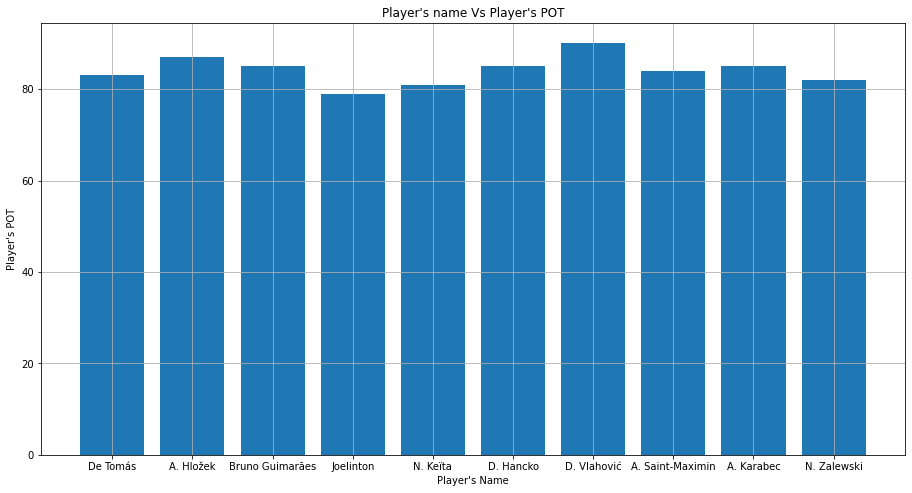

In [30]:
# Taking only the top 10 players in the frame
x=fifa['Name'].head(10)
y=fifa['POT'].head(10)
fig=plt.figure()
fig.add_axes([1,2,2,1.5])
plt.title("Player's name Vs Player's POT")
plt.xlabel("Player's Name")
plt.ylabel("Player's POT")
plt.grid()
plt.bar(x,y)

* Player's Name Vs Player's Wage Graph

<BarContainer object of 10 artists>

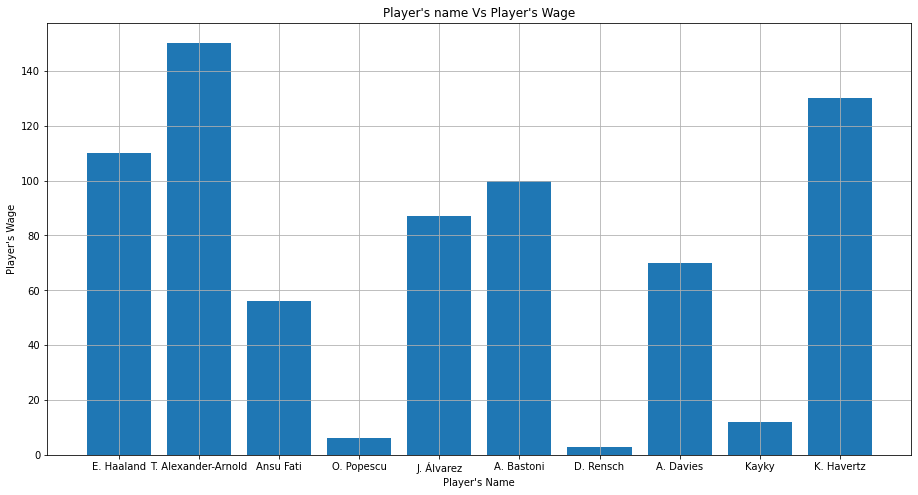

In [31]:
# Taking only the bottom 10 players into the frame

x=fifa['Name'].tail(10)
y=fifa['Wage (K$)'].tail(10)
fig=plt.figure()
fig.add_axes([1,2,2,1.5])
plt.title("Player's name Vs Player's Wage")
plt.xlabel("Player's Name")
plt.ylabel("Player's Wage")
plt.grid()
plt.bar(x,y)

* The players whose potential is more than or equal to 90

In [32]:
fifa[fifa["POT"]>=90][['Name','POT']]

,Name,POT
6,D. Vlahović,90
22,L. Messi,92
23,Pedri,92
28,J. Bellingham,90
30,R. Gravenberch,90
31,Rafael Leão,90
35,K. Benzema,91
37,Cristiano Ronaldo,91
52,S. Tonali,90
55,F. de Jong,92


* The players who potential is more than 90 and age is less than 20

In [33]:
fifa[(fifa['POT']>90) & (fifa['Age']<20)]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
23,Pedri,18,84,92,FC Barcelona,88.5,66,2096


* The players whose Value is greater than 10 and Wage is less than 50

In [34]:
fifa[(fifa['Value (M$)']>10) & (fifa['Wage (K$)']<50)]

,Name,Age,OVA,POT,Team,Value (M$),Wage (K$),Total
0,De Tomás,26,82,83,RCD Espanyol de Barcelona,36.5,32,2091
2,Bruno Guimarães,23,80,85,Newcastle United,29.0,39,2077
7,A. Saint-Maximin,24,81,84,Newcastle United,35.0,46,1919
10,A. Tchouaméni,21,81,88,AS Monaco,52.0,46,2141
12,D. Núñez,22,78,86,SL Benfica,32.0,15,1987
14,Gavi,16,77,89,FC Barcelona,24.0,14,1970
19,N. Schlotterbeck,21,80,86,Sport-Club Freiburg,31.0,23,1839
21,N. Madueke,19,77,88,PSV,23.0,11,1897
26,J. Timber,20,79,88,Ajax,36.0,13,1935
27,M. Guéhi,20,76,85,Crystal Palace,15.5,32,1718


* HeatMap Correlation


<AxesSubplot:>

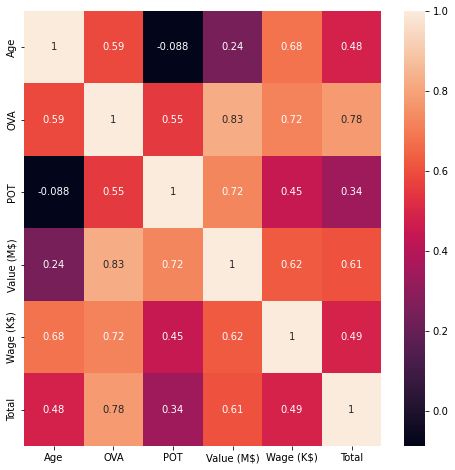

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(fifa.corr(), annot=True)